# Transfer Learning on Stack Exchange Tags
## Kaggle competition
https://www.kaggle.com/c/transfer-learning-on-stack-exchange-tags

In [2]:
import pandas as pd
from statistics import mode
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import re
from sklearn.ensemble import RandomForestClassifier

In [3]:
dataframe_1 = pd.DataFrame()
data_list = ['biology', 'cooking', 'crypto', 'diy', 'robotics', 'travel']
pd.set_option('max_colwidth', 800)

for theme in data_list:
    path = "dados/" + theme + ".csv"
    #x = pd.read_csv(path)
    x = pd.DataFrame(pd.read_csv(path))
    x['subject'] = theme
    dataframe_1 = dataframe_1.append(x)

dataframe_1.head(10)

,id,title,content,tags,subject
0,1,What is the criticality of the ribosome binding site relative to the start codon in prokaryotic translation?,"<p>In prokaryotic translation, how critical for efficient translation is the location of the ribosome binding site, relative to the start codon?</p>\n\n<p>Ideally, it is supposed to be -7b away from the start. How about if it is -9 bases away or even more? Will this have an observable effect on translation?</p>\n",ribosome binding-sites translation synthetic-biology,biology
1,2,How is RNAse contamination in RNA based experiments prevented?,<p>Does anyone have any suggestions to prevent RNAse contamination when working with RNA?</p>\n\n<p>I tend to have issues with degradation regardless of whether I use DEPC treated / RNAse free water and filtered pipette tips.</p>\n,rna biochemistry,biology
2,3,Are lymphocyte sizes clustered in two groups?,"<p>Tortora writes in <em>Principles of Anatomy and Physiology</em>:</p>\n\n<blockquote>\n <p>Lymphocytes may be as small as 6–9 μm in diameter or as large as 10–14 μm in diameter.</p>\n</blockquote>\n\n<p>Those ranges are quite close to each others. Should the above be taken to mean that lymphocytes sizes are clustered in two groups, or is it just a way of saying that lymphocytes are 6-14 μm?</p>\n",immunology cell-biology hematology,biology
3,4,How long does antibiotic-dosed LB maintain good selection?,"<p>Various people in our lab will prepare a liter or so of LB, add kanamycin to 25-37 mg/L for selection, and store it at 4 °C for minipreps or other small cultures (where dosing straight LB with a 1000X stock is troublesome). Some think using it after more than a week is dubious, but we routinely use kan plates that are 1-2 months old with no ill effect.</p>\n\n<p>How long can LB with antibiotic such as kanamycin, chloramphenicol, or ampicillin be stored at 4 °C and maintain selection?</p>\n",cell-culture,biology
4,5,Is exon order always preserved in splicing?,"<p>Are there any cases in which the splicing machinery constructs an mRNA in which the exons are not in the 5' -> 3' genomic order? I'm interested any such cases, whether they involve constitutive or alternative splicing.</p>\n",splicing mrna spliceosome introns exons,biology
5,6,How can I avoid digesting protein-bound DNA?,"<p>I'm interested in sequencing and analyzing the bound DNA, and minimizing the amount of unbound DNA that gets sequenced through digestion.</p>\n\n<p>When digesting protein-bound DNA, is <em>all</em> of the unbound DNA digested? Is there a way to maximize the amount of unbound DNA that is digested?</p>\n",dna biochemistry molecular-biology,biology
6,8,Under what conditions do dendritic spines form?,"<p>I'm looking for resources or any information about the formation of dendritic spines and synaptogenesis, especially in relation to how new connections are formed on a daily basis.</p>\n\n<p>Does the electrotonic signalling along the axons and through the spines cause new connections to be made based on some kind of spatial condition (maybe an electrical or chemical attraction), or is there some larger heuristic here?</p>\n",neuroscience synapses,biology
7,9,How should I ship plasmids?,"<p>I shipped 10 µL of my vector miniprep to a collaborator in a 1.5 mL eppendorf parafilmed shut and stuffed into a 50 mL conical with some paper-towel padding. However, something happened on the way and there was nothing (no liquid) in the tube when it arrived. They didn't make any comments about the microcentrifuge tube popping open or broken parafilm, so nothing crazy happened but something did.</p>\n\n<p>What's the most reliable way to ship plasmids?</p>\n",plasmids,biology
8,10,What is the reason behind choosing the reporter gene when experimenting on your gene of interest?,"<p>I noticed within example experiments in class that different reporter genes are chosen to be inserted near your gene of interest to prove whether or not the gene is being expressed. For example, you may insert

### Removing html tags and '\n' from 'content' column

In [4]:
comments = list(dataframe_1['content'])
comments_clean = []

for comment in comments:
    #clean html tags
    x = BeautifulSoup(comment, 'html5lib').get_text()
    #clean new line operator and ponctuation's marks
    x_2 = re.sub("[^a-zA-Z]", " ", x) 
    #for rep in ['\n','.','?','!',',',';',':',"'",")","("]:
    #    x = x.replace(rep, ' ')
    comments_clean.append(x_2)
    
comments_clean[:5]

['In prokaryotic translation  how critical for efficient translation is the location of the ribosome binding site  relative to the start codon   Ideally  it is supposed to be   b away from the start  How about if it is    bases away or even more  Will this have an observable effect on translation  ',
 'Does anyone have any suggestions to prevent RNAse contamination when working with RNA   I tend to have issues with degradation regardless of whether I use DEPC treated   RNAse free water and filtered pipette tips  ',
 'Tortora writes in Principles of Anatomy and Physiology      Lymphocytes may be as small as      m in diameter or as large as        m in diameter    Those ranges are quite close to each others  Should the above be taken to mean that lymphocytes sizes are clustered in two groups  or is it just a way of saying that lymphocytes are       m  ',
 'Various people in our lab will prepare a liter or so of LB  add kanamycin to       mg L for selection  and store it at    C for mini

### Removing stop words

In [5]:
stop = set(stopwords.words('english'))
split_comments = []
for comment in comments_clean:
    x = comment.split()
    split_comments.append(x)

split_comments_2 = []

for comment in split_comments:
    word_list = []
    for word in comment:
        if word.lower() not in stop:
            word_list.append(word.lower())
    split_comments_2.append(word_list)


In [6]:
print(split_comments_2[:5])

[['prokaryotic', 'translation', 'critical', 'efficient', 'translation', 'location', 'ribosome', 'binding', 'site', 'relative', 'start', 'codon', 'ideally', 'supposed', 'b', 'away', 'start', 'bases', 'away', 'even', 'observable', 'effect', 'translation'], ['anyone', 'suggestions', 'prevent', 'rnase', 'contamination', 'working', 'rna', 'tend', 'issues', 'degradation', 'regardless', 'whether', 'use', 'depc', 'treated', 'rnase', 'free', 'water', 'filtered', 'pipette', 'tips'], ['tortora', 'writes', 'principles', 'anatomy', 'physiology', 'lymphocytes', 'may', 'small', 'diameter', 'large', 'diameter', 'ranges', 'quite', 'close', 'others', 'taken', 'mean', 'lymphocytes', 'sizes', 'clustered', 'two', 'groups', 'way', 'saying', 'lymphocytes'], ['various', 'people', 'lab', 'prepare', 'liter', 'lb', 'add', 'kanamycin', 'mg', 'l', 'selection', 'store', 'c', 'minipreps', 'small', 'cultures', 'dosing', 'straight', 'lb', 'x', 'stock', 'troublesome', 'think', 'using', 'week', 'dubious', 'routinely', '

In [7]:
print(len(split_comments_2))

87000


In [8]:
dataframe_1.shape

(87000, 5)

### Working with variable 'title'

In [9]:
titles = list(dataframe_1['title'])
titles_clean = []

for title in titles:
    #clean new line operator and ponctuation's marks
    title_2 = re.sub("[^a-zA-Z]", " ", title) 
    #for rep in ['\n','.','?','!',',',';',':',"'",'"',"(",")","/","-"]:
    #    title = title.replace(rep, ' ')
    titles_clean.append(title_2)
    
titles_clean[:10]

['What is the criticality of the ribosome binding site relative to the start codon in prokaryotic translation ',
 'How is RNAse contamination in RNA based experiments prevented ',
 'Are lymphocyte sizes clustered in two groups ',
 'How long does antibiotic dosed LB maintain good selection ',
 'Is exon order always preserved in splicing ',
 'How can I avoid digesting protein bound DNA ',
 'Under what conditions do dendritic spines form ',
 'How should I ship plasmids ',
 'What is the reason behind choosing the reporter gene when experimenting on your gene of interest ',
 'How many times did endosymbiosis occur ']

In [10]:
split_titles = []
for title in titles_clean:
    x = title.split()
    split_titles.append(x)

split_titles_2 = []

for title in split_titles:
    word_list = []
    for word in title:
        if word.lower() not in stop:
            word_list.append(word.lower())
    split_titles_2.append(word_list)
    
print(split_titles_2[:6])

[['criticality', 'ribosome', 'binding', 'site', 'relative', 'start', 'codon', 'prokaryotic', 'translation'], ['rnase', 'contamination', 'rna', 'based', 'experiments', 'prevented'], ['lymphocyte', 'sizes', 'clustered', 'two', 'groups'], ['long', 'antibiotic', 'dosed', 'lb', 'maintain', 'good', 'selection'], ['exon', 'order', 'always', 'preserved', 'splicing'], ['avoid', 'digesting', 'protein', 'bound', 'dna']]


In [11]:
len(split_titles_2)

87000

### First tags
#### 1 - Words in title and content

In [11]:
tags_list = []
for i in range(len(split_titles_2)):
    
    title_tags = []
    for ii in range(len(split_titles_2[i])):
        if split_titles_2[i][ii] in split_comments_2[i]:
            title_tags.append(split_titles_2[i][ii])
    tags_list.append(list(set(title_tags)))

tags_list[:10]

[['ribosome',
  'prokaryotic',
  'site',
  'binding',
  'start',
  'relative',
  'translation',
  'codon'],
 ['RNAse', 'contamination', 'RNA'],
 ['sizes', 'two', 'groups', 'clustered'],
 ['LB', 'maintain', 'long', 'selection'],
 ['order', 'splicing'],
 ['DNA', 'protein-bound', 'digesting'],
 ['dendritic', 'spines'],
 ['ship', 'plasmids'],
 ['reporter', 'gene', 'interest'],
 ['times', 'many']]

# First submition

In [21]:
dataframe_test = pd.read_csv('dados/test.csv')
dataframe_test.head(10)

,id,title,content
0,1,What is spin as it relates to subatomic particles?,"<p>I often hear about subatomic particles having a property called ""spin"" but also that it doesn't actually relate to spinning about an axis like you would think. Which particles have spin? What does spin mean if not an actual spinning motion?</p>\n"
1,2,What is your simplest explanation of the string theory?,<p>How would you explain string theory to non physicists such as myself? I'm specially interested on how plausible is it and what is needed to successfully prove it?</p>\n
2,3,"Lie theory, Representations and particle physics","<p>This is a question that has been posted at many different forums, I thought maybe someone here would have a better or more conceptual answer than I have seen before:</p>\n\n<p>Why do physicists care about representations of Lie groups? For myself, when I think about a representation that means there is some sort of group acting on a vector space, what is the vector space that this Lie group is acting on? </p>\n\n<p>Or is it that certain things have to be invariant under a group action?\nmaybe this is a dumb question, but i thought it might be a good start...</p>\n\n<p>To clarify, I am specifically thinking of the symmetry groups that people think about in relation to the standard model. I do not care why it might be a certain group, but more how we see the group acting, what is it a..."
3,7,Will Determinism be ever possible?,<p>What are the main problems that we need to solve to prove Laplace's determinism correct and overcome the Uncertainty principle?</p>\n
4,9,Hamilton's Principle,"<p>Hamilton's principle states that a dynamic system always follows a path such that its action integral is stationary (that is, maximum or minimum).</p>\n\n<p>Why should the action integral be stationary? On what basis did Hamilton state this principle?</p>\n"
5,13,What is sound and how is it produced?,"<p>I've been using the term ""sound"" all my life, but I really have no clue as to what sound exactly is or how it is created. What is sound? How is it produced? Can it be measured?</p>\n"
6,15,What experiment would disprove string theory?,"<p>I know that there's big controversy between two groups of physicists:</p>\n\n<ol>\n<li>those who support string theory (most of them, I think)</li>\n<li>and those who oppose it.</li>\n</ol>\n\n<p>One of the arguments of the second group is that there's no way to disprove the correctness of the string theory.</p>\n\n<p>So my question is if there's any defined experiment that would disprove string theory? </p>\n"
7,17,"Why does the sky change color? Why the sky is blue during the day, red during sunrise/set and black during the night?","<p>Why does the sky change color? Why the sky is blue during the day, red during sunrise/set and black during the night?</p>\n"
8,19,How's the energy of particle collisions calculated?,"<p>Physicists often refer to the energy of collisions between different particles. My question is: how is that energy calculated? Is that kinetic energy?</p>\n\n<p>Also, related to this question, I know that the aim is to have higher and higher energy collisions (e.g to test for Higgs Boson). My understanding is that to have higher energy you can either accelerate them more, or use particles with higher mass. Is this correct?</p>\n"
9,21,Monte Carlo use,<p>Where is the Monte Carlo method used in physics?</p>\n


In [22]:
comments = list(dataframe_test['content'])
comments_clean = []

for comment in comments:
    #clean html tags
    x = BeautifulSoup(comment, 'html5lib').get_text()
    #clean new line operator and ponctuation's marks
    x_2 = re.sub("[^a-zA-Z]", " ", x) 
    #for rep in ['\n','.','?','!',',',';',':',"'",'"',"(",")","/","-"]:
    #    x = x.replace(rep, ' ')
    comments_clean.append(x_2)
    
comments_clean[:5]

['I often hear about subatomic particles having a property called  spin  but also that it doesn t actually relate to spinning about an axis like you would think  Which particles have spin  What does spin mean if not an actual spinning motion  ',
 'How would you explain string theory to non physicists such as myself  I m specially interested on how plausible is it and what is needed to successfully prove it  ',
 'This is a question that has been posted at many different forums  I thought maybe someone here would have a better or more conceptual answer than I have seen before   Why do physicists care about representations of Lie groups  For myself  when I think about a representation that means there is some sort of group acting on a vector space  what is the vector space that this Lie group is acting on    Or is it that certain things have to be invariant under a group action  maybe this is a dumb question  but i thought it might be a good start     To clarify  I am specifically thinkin

In [26]:
stop = set(stopwords.words('english'))
split_comments = []
for comment in comments_clean:
    x = comment.split()
    split_comments.append(x)

split_comments_2 = []

for comment in split_comments:
    word_list = []
    for word in comment:
        if word.lower() not in stop:
            word_list.append(word.lower())
    split_comments_2.append(word_list)

In [27]:
print(split_comments_2[:5])

[['often', 'hear', 'subatomic', 'particles', 'property', 'called', 'spin', 'also', 'actually', 'relate', 'spinning', 'axis', 'like', 'would', 'think', 'particles', 'spin', 'spin', 'mean', 'actual', 'spinning', 'motion'], ['would', 'explain', 'string', 'theory', 'non', 'physicists', 'specially', 'interested', 'plausible', 'needed', 'successfully', 'prove'], ['question', 'posted', 'many', 'different', 'forums', 'thought', 'maybe', 'someone', 'would', 'better', 'conceptual', 'answer', 'seen', 'physicists', 'care', 'representations', 'lie', 'groups', 'think', 'representation', 'means', 'sort', 'group', 'acting', 'vector', 'space', 'vector', 'space', 'lie', 'group', 'acting', 'certain', 'things', 'invariant', 'group', 'action', 'maybe', 'dumb', 'question', 'thought', 'might', 'good', 'start', 'clarify', 'specifically', 'thinking', 'symmetry', 'groups', 'people', 'think', 'relation', 'standard', 'model', 'care', 'might', 'certain', 'group', 'see', 'group', 'acting', 'acting', 'etc'], ['main'

In [28]:
titles = list(dataframe_test['title'])
titles_clean = []

for title in titles:
    #clean new line operator and ponctuation's marks
    title_2 = re.sub("[^a-zA-Z]", " ", title) 
    #for rep in ['\n','.','?','!',',',';',':',"'",'"',"(",")","/"]:
    #    title = title.replace(rep, ' ')
    titles_clean.append(title_2)
    
titles_clean[:10]

['What is spin as it relates to subatomic particles ',
 'What is your simplest explanation of the string theory ',
 'Lie theory  Representations and particle physics',
 'Will Determinism be ever possible ',
 'Hamilton s Principle',
 'What is sound and how is it produced ',
 'What experiment would disprove string theory ',
 'Why does the sky change color  Why the sky is blue during the day  red during sunrise set and black during the night ',
 'How s the energy of particle collisions calculated ',
 'Monte Carlo use']

In [29]:
split_titles = []
for title in titles_clean:
    x = title.split()
    split_titles.append(x)

split_titles_2 = []

for title in split_titles:
    word_list = []
    for word in title:
        if word.lower() not in stop:
            word_list.append(word.lower())
    split_titles_2.append(word_list)
    
print(split_titles_2[:6])

[['spin', 'relates', 'subatomic', 'particles'], ['simplest', 'explanation', 'string', 'theory'], ['lie', 'theory', 'representations', 'particle', 'physics'], ['determinism', 'ever', 'possible'], ['hamilton', 'principle'], ['sound', 'produced']]


In [30]:
tags_list = []
for i in range(len(split_titles_2)):
    
    title_tags = []
    for ii in range(len(split_titles_2[i])):
        if split_titles_2[i][ii] in split_comments_2[i]:
            title_tags.append(split_titles_2[i][ii].lower())
    tags_list.append(list(set(title_tags)))

tags_list[:10]

[['subatomic', 'particles', 'spin'],
 ['theory', 'string'],
 ['lie', 'representations'],
 ['determinism'],
 ['principle', 'hamilton'],
 ['sound', 'produced'],
 ['theory', 'would', 'experiment', 'disprove', 'string'],
 ['sunrise',
  'night',
  'blue',
  'color',
  'red',
  'set',
  'change',
  'black',
  'sky',
  'day'],
 ['collisions', 'calculated', 'energy'],
 ['monte', 'carlo']]

In [31]:
submit = []
for i in range(len(tags_list)):
    submit.append([' '.join(tags_list[i])])
print(submit[:10])
len(submit)

[['subatomic particles spin'], ['theory string'], ['lie representations'], ['determinism'], ['principle hamilton'], ['sound produced'], ['theory would experiment disprove string'], ['sunrise night blue color red set change black sky day'], ['collisions calculated energy'], ['monte carlo']]


81926

In [27]:
# Writing csv file to submission
df_tags = pd.DataFrame(submit, columns=['tags'])
submit_df = pd.DataFrame(columns=['id','tags'])
submit_df['id'] = dataframe_test['id']
submit_df['tags'] = df_tags['tags']
submit_df.to_csv('submit_1.csv', index = False, quoting=1)


,tags
0,subatomic spin particles
1,string theory
2,lie
3,
4,hamilton
5,produced sound
6,theory string would experiment disprove
7,change red night color black sky day blue sunr...
8,collisions calculated energy
9,monte carlo


### Adding most frequent word in title and content

In [32]:
ds_titles = pd.Series(split_titles_2)
ds_contents = pd.Series(split_comments_2)
df_treated = pd.DataFrame()
df_treated['title'] = ds_titles
df_treated['content'] = ds_contents
#df_treated.mode()

### Search for tags words in test.csv

In [29]:
test_tags_list = []
for row in list(dataframe_1['tags']):
    for word in row.split():
        test_tags_list.append(word)
test_tags_list = list(set(test_tags_list))
test_tags_list[:10]

['proteomics',
 'paneer',
 'ewr',
 'synthetic-biology',
 'placement',
 'jet-airways',
 'camping',
 'password-hashing',
 'interrail',
 'sar']

In [30]:
tags_list_2 = []
word_list_2 = []
i=0
for title in split_titles_2:
    for word in title:
        if word.lower() in test_tags_list:
            word_list_2.append(word.lower())
        for word_2 in title:
            if str(word.lower() + '-' + word_2.lower()) in test_tags_list:
                word_list_2.append(str(word.lower() + '-' + word_2.lower()))
    tags_list_2.append(list(set(word_list_2)))
    word_list_2 = []
    
tags_list_2[:100]

[[],
 ['theory'],
 ['theory'],
 [],
 [],
 [],
 ['theory', 'experiment'],
 ['color'],
 ['energy'],
 [],
 [],
 [],
 ['measurement'],
 [],
 ['theory'],
 ['sink', 'bathtub'],
 ['energy'],
 [],
 [],
 [],
 [],
 [],
 ['stress', 'materials'],
 [],
 ['treatment', 'cancer'],
 [],
 ['materials'],
 [],
 [],
 ['light'],
 [],
 [],
 [],
 [],
 ['beam', 'laser'],
 ['current'],
 ['stability'],
 ['energy'],
 [],
 ['force'],
 [],
 [],
 [],
 [],
 ['tools'],
 [],
 [],
 [],
 ['data', 'reference-request'],
 ['salt', 'water', 'boiling'],
 ['tap-water', 'temperature', 'water'],
 [],
 [],
 ['force'],
 [],
 ['energy'],
 [],
 [],
 [],
 [],
 ['torque'],
 ['mechanism'],
 ['books'],
 ['information'],
 [],
 ['current'],
 ['transformation'],
 [],
 [],
 ['spaghetti'],
 [],
 ['software'],
 ['human', 'gyroscope'],
 ['study'],
 [],
 [],
 [],
 [],
 ['chain'],
 ['angle'],
 ['water', 'vegetation'],
 ['clothing'],
 [],
 [],
 [],
 [],
 ['energy'],
 ['work'],
 ['water'],
 [],
 ['radiation'],
 [],
 ['measurement'],
 ['force'],
 [

In [31]:
print(len(tags_list))
print(len(tags_list_2))

81926
81926


In [32]:
tags_list_3 = []
for i in range(len(tags_list)):
    tags_list_3.append(list(set(tags_list[i] + tags_list_2[i])))

print(len(tags_list_3))
print(tags_list_3[:20])

81926
[['spin', 'particles', 'subatomic'], ['theory', 'string'], ['lie', 'theory'], [], ['hamilton'], ['sound', 'produced'], ['theory', 'string', 'experiment', 'would', 'disprove'], ['day', 'sky', 'black', 'change', 'night', 'blue', 'color', 'sunrise', 'red', 'set'], ['energy', 'collisions', 'calculated'], ['monte', 'carlo'], ['bicycle', 'cause', 'leaning'], ['field', 'electromagnetic'], ['interaction', 'measurement', 'mechanics'], ['speed', 'average', 'calculate'], ['theory', 'relativity'], ['sink', 'bathtub', 'show'], ['magnets', 'energy', 'repel'], ['check', 'real', 'world'], ['field', 'mathematics', 'theories'], ['capacitive']]


In [118]:
submit = []
for i in range(len(tags_list_3)):
    submit.append([' '.join(tags_list_3[i])])
print(submit[:10])
len(submit)

[['subatomic spin particles'], ['string theory'], ['lie theory'], [''], ['hamilton'], ['produced sound'], ['disprove theory would experiment string'], ['sky change sunrise red set night color black day blue'], ['collisions calculated energy'], ['monte carlo']]


81926

In [119]:
# Writing csv file to submission
df_tags = pd.DataFrame(submit, columns=['tags'])
submit_df = pd.DataFrame(columns=['id','tags'])
submit_df['id'] = dataframe_test['id']
submit_df['tags'] = df_tags['tags']
submit_df.to_csv('submit_2.csv', index = False, quoting=1)

### Statisctics from tags

In [14]:
test_tags = []
for tags in dataframe_1['tags']:
    for tag in tags.split():
        test_tags.append(tag)
ds_test_tags = pd.Series(test_tags)
ds_test_tags.value_counts()

electrical                 4490
visas                      3829
air-travel                 2273
plumbing                   2223
usa                        2168
encryption                 1783
wiring                     1680
schengen                   1561
uk                         1522
human-biology              1448
baking                     1444
genetics                   1229
food-safety                1211
evolution                  1159
hash                       1141
rsa                        1095
customs-and-immigration    1067
transit                    1016
lighting                   1003
biochemistry                984
aes                         923
hvac                        922
substitutions               920
bathroom                    885
trains                      864
molecular-biology           863
water                       861
public-key                  842
repair                      832
equipment                   816
                           ... 
error-ma

In [15]:
dataframe_1['id'].value_counts()

10277    6
1638     6
8289     6
10056    6
1483     6
9111     6
9225     5
20465    5
10436    5
11361    5
754      5
37200    5
39408    5
16217    5
9063     5
16520    5
4        5
6        5
5656     5
14518    5
1518     5
1987     5
11       5
8648     5
27596    5
7913     5
7866     5
835      5
9418     5
8539     5
        ..
65606    1
71749    1
69700    1
79937    1
57402    1
61496    1
38965    1
43123    1
32886    1
34935    1
14497    1
49342    1
55485    1
57530    1
37044    1
45232    1
22701    1
6309     1
10403    1
92299    1
61560    1
90250    1
94344    1
65670    1
77952    1
49278    1
55421    1
59515    1
57466    1
55483    1
Name: id, dtype: int64

### Most frequent words in content by subject

In [58]:
dataframe_2 = dataframe_1
dataframe_2['title'] = split_titles_2
dataframe_2['content'] = split_titles_2
dataframe_1

,id,title,content,tags,subject
0,1,"[criticality, ribosome, binding, site, relative, start, codon, prokaryotic, translation]","[criticality, ribosome, binding, site, relative, start, codon, prokaryotic, translation]",ribosome binding-sites translation synthetic-biology,biology
1,2,"[RNAse, contamination, RNA, based, experiments, prevented]","[RNAse, contamination, RNA, based, experiments, prevented]",rna biochemistry,biology
2,3,"[lymphocyte, sizes, clustered, two, groups]","[lymphocyte, sizes, clustered, two, groups]",immunology cell-biology hematology,biology
3,4,"[long, antibiotic-dosed, LB, maintain, good, selection]","[long, antibiotic-dosed, LB, maintain, good, selection]",cell-culture,biology
4,5,"[exon, order, always, preserved, splicing]","[exon, order, always, preserved, splicing]",splicing mrna spliceosome introns exons,biology
5,6,"[avoid, digesting, protein-bound, DNA]","[avoid, digesting, protein-bound, DNA]",dna biochemistry molecular-biology,biology
6,8,"[conditions, dendritic, spines, form]","[conditions, dendritic, spines, form]",neuroscience synapses,biology
7,9,"[ship, plasmids]","[ship, plasmids]",plasmids,biology
8,10,"[reason, behind, choosing, reporter, gene, experimenting, gene, interest]","[reason, behind, choosing, reporter, gene, experimenting, gene, interest]",molecular-genetics gene-expression experimental-design,biology
9,11,"[many, times, endosymbiosis, occur]","[many, times, endosymbiosis, occur]",evolution mitochondria chloroplasts,biology


In [71]:
words_pool = dict()
for subject in data_list:
    print(subject)
    words_pool[subject] = list(dataframe_2['title'].loc[dataframe_2['subject'] == subject])
    words_pool[subject].append(list(dataframe_2['content'].loc[dataframe_2['subject'] == subject]))

biology
cooking
crypto
diy
robotics
travel


In [78]:
words_pool['biology'][:10]

[['criticality',
  'ribosome',
  'binding',
  'site',
  'relative',
  'start',
  'codon',
  'prokaryotic',
  'translation'],
 ['RNAse', 'contamination', 'RNA', 'based', 'experiments', 'prevented'],
 ['lymphocyte', 'sizes', 'clustered', 'two', 'groups'],
 ['long', 'antibiotic-dosed', 'LB', 'maintain', 'good', 'selection'],
 ['exon', 'order', 'always', 'preserved', 'splicing'],
 ['avoid', 'digesting', 'protein-bound', 'DNA'],
 ['conditions', 'dendritic', 'spines', 'form'],
 ['ship', 'plasmids'],
 ['reason',
  'behind',
  'choosing',
  'reporter',
  'gene',
  'experimenting',
  'gene',
  'interest'],
 ['many', 'times', 'endosymbiosis', 'occur']]

### Creating Clusters

(150, 2)


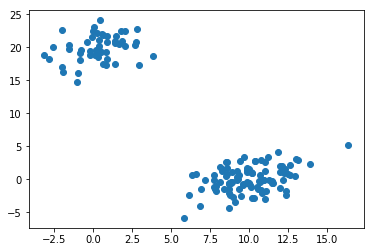

In [17]:
# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print(X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

In [19]:
X

array([[  9.21188389e+00,  -1.51885892e-01],
       [  8.88937431e+00,  -3.39374638e-01],
       [  1.07684006e+01,   2.95244645e+00],
       [  8.24213268e+00,   1.29094802e+00],
       [  5.79670090e+00,  -5.83776714e+00],
       [  6.34993090e+00,   6.39595151e-01],
       [  8.10571230e+00,  -4.58872773e-01],
       [  8.72084884e+00,  -4.40444487e+00],
       [  8.83500513e+00,  -3.91661101e-01],
       [  1.04006121e+01,   2.71240817e+00],
       [  1.19550340e+01,   1.98602715e+00],
       [  8.50141850e+00,   5.03495832e-01],
       [  9.23359190e+00,   1.30693205e+00],
       [  1.22776800e+01,   1.62763958e+00],
       [  1.09590184e+01,  -1.27520318e-01],
       [  8.72437412e+00,  -7.31019114e-01],
       [  9.64949127e+00,   3.41989410e+00],
       [  1.14991208e+01,  -5.51131721e-01],
       [  1.14825643e+01,  -2.86234942e-01],
       [  8.58740424e+00,   1.66814229e+00],
       [  1.19557043e+01,  -1.27350693e+00],
       [  9.85622312e+00,   1.08989137e+00],
       [  

## Bag of words

In [34]:
bag_of_words = []
i = 1
for comment in split_comments_2:
    if i%1000 == 0:
        completed = int((i/len(split_comments_2))*100)
        print("%d percent comments completed\r" % (completed))
    bag_of_words.extend(comment)
    i+=1    
i = 1
for title in split_titles_2:
    if i%1000 == 0:
        completed = int((i/len(split_comments_2))*100)
        print("%d percent titles completed\r" % (completed))
    bag_of_words.extend(title)
    i+=1

1 percent comments completed
2 percent comments completed
3 percent comments completed
4 percent comments completed
5 percent comments completed
6 percent comments completed
8 percent comments completed
9 percent comments completed
10 percent comments completed
11 percent comments completed
12 percent comments completed
13 percent comments completed
14 percent comments completed
16 percent comments completed
17 percent comments completed
18 percent comments completed
19 percent comments completed
20 percent comments completed
21 percent comments completed
22 percent comments completed
24 percent comments completed
25 percent comments completed
26 percent comments completed
27 percent comments completed
28 percent comments completed
29 percent comments completed
31 percent comments completed
32 percent comments completed
33 percent comments completed
34 percent comments completed
35 percent comments completed
36 percent comments completed
37 percent comments completed
39 percent comment

In [86]:
#bag_of_words_d = list(set(bag_of_words))

#wordfreq = []
#i = 1
#for w in bag_of_words_d:
#    if i % 1000 == 0:
#        percent = int((i / len(bag_of_words_d))*100)
#        print("%d percent concluded" % (percent)) 
#    wordfreq.append(bag_of_words.count(w))
#    i+=1
    
#wordfreq = [bag_of_words.count(w) for w in bag_of_words_d]

## Exemplo Kaggle

In [12]:
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

In [33]:
split_words = []
for i in range(len(split_titles_2)):
    split_words.append(" ".join(split_titles_2[i]) + " " + " ".join(split_comments_2[i]))
split_words[:100]

['spin relates subatomic particles often hear subatomic particles property called spin also actually relate spinning axis like would think particles spin spin mean actual spinning motion',
 'simplest explanation string theory would explain string theory non physicists specially interested plausible needed successfully prove',
 'lie theory representations particle physics question posted many different forums thought maybe someone would better conceptual answer seen physicists care representations lie groups think representation means sort group acting vector space vector space lie group acting certain things invariant group action maybe dumb question thought might good start clarify specifically thinking symmetry groups people think relation standard model care might certain group see group acting acting etc',
 'determinism ever possible main problems need solve prove laplace determinism correct overcome uncertainty principle',
 'hamilton principle hamilton principle states dynamic sys

In [34]:
train_data_features = vectorizer.fit_transform(split_words)
train_data_features = train_data_features.toarray()

In [15]:
train_data_features[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
vocab = vectorizer.get_feature_names()
print(vocab[:100])

['aa', 'ab', 'abc', 'ability', 'able', 'abroad', 'absence', 'absolute', 'absolutely', 'absorb', 'ac', 'acc', 'acceleration', 'accelerometer', 'accept', 'acceptable', 'accepted', 'access', 'accessible', 'accidentally', 'accommodate', 'accommodation', 'accomplish', 'according', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'achieve', 'achieved', 'acid', 'acidic', 'acids', 'across', 'acrylic', 'act', 'acting', 'action', 'activate', 'activated', 'activation', 'active', 'activities', 'activity', 'acts', 'actual', 'actually', 'ad', 'adapter', 'adaptive', 'add', 'added', 'adding', 'addition', 'additional', 'additionally', 'additive', 'address', 'adds', 'adequate', 'adhesive', 'adjacent', 'adjust', 'adjustable', 'adjusted', 'adult', 'adults', 'advance', 'advanced', 'advantage', 'advantages', 'adversary', 'advice', 'advise', 'advised', 'ae', 'aes', 'afci', 'affect', 'affected', 'affects', 'afford', 'affordable', 'afraid', 'africa', 'african', 'afternoon', 'afterwards', 'agar', 'a

In [17]:
# Sum up the counts of each vocabulary word
#dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
#for tag, count in zip(vocab, dist):
#    print(count, tag)

In [19]:
forest = RandomForestClassifier(n_estimators = 10, max_depth=5) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_data_features, dataframe_1['tags'] )

In [ ]:
test_data_features = vectorizer.transform(split_words)
test_data_features = test_data_features.toarray()

result = forest.predict(test_data_features)

output = pd.DataFrame( data={"id":dataframe_test["id"], "tags":result} )

output.to_csv( "submit_3.csv", index=False, quoting=1)